<a href="https://colab.research.google.com/github/Gameto2025/Desafio_TelecomX/blob/main/Desafio__TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.  Extracción y Conversion a Dataframe.

In [61]:
import pandas as pd
import requests
import json

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'
response = requests.get(url)
data = json.loads(response.text)

print(data[:2])

[{'customerID': '0002-ORFBO', 'Churn': 'No', 'customer': {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}, 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'}, 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}, 'account': {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}}, {'customerID': '0003-MKNFE', 'Churn': 'No', 'customer': {'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}, 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}, 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}, 'account': {'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMeth

#### Revisando los datos extraidos.

In [62]:
import pprint
pprint.pprint(data[0])

{'Churn': 'No',
 'account': {'Charges': {'Monthly': 65.6, 'Total': '593.3'},
             'Contract': 'One year',
             'PaperlessBilling': 'Yes',
             'PaymentMethod': 'Mailed check'},
 'customer': {'Dependents': 'Yes',
              'Partner': 'Yes',
              'SeniorCitizen': 0,
              'gender': 'Female',
              'tenure': 9},
 'customerID': '0002-ORFBO',
 'internet': {'DeviceProtection': 'No',
              'InternetService': 'DSL',
              'OnlineBackup': 'Yes',
              'OnlineSecurity': 'No',
              'StreamingMovies': 'No',
              'StreamingTV': 'Yes',
              'TechSupport': 'Yes'},
 'phone': {'MultipleLines': 'No', 'PhoneService': 'Yes'}}


#### Conversion de datos a dataframe para analisis

In [63]:
response = requests.get(url)
data = json.loads(response.text)

# Aplanar columnas anidadas
df = pd.json_normalize(data, sep='_')

df.columns.tolist()
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [64]:
df.tail()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


# 2. Transformación de los datos

#### Explorar las columnas del dataset y Verificar sus tipos de datos.

In [65]:
df.columns.tolist()

['customerID',
 'Churn',
 'customer_gender',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'phone_MultipleLines',
 'internet_InternetService',
 'internet_OnlineSecurity',
 'internet_OnlineBackup',
 'internet_DeviceProtection',
 'internet_TechSupport',
 'internet_StreamingTV',
 'internet_StreamingMovies',
 'account_Contract',
 'account_PaperlessBilling',
 'account_PaymentMethod',
 'account_Charges_Monthly',
 'account_Charges_Total']

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

#### Renombrar las columnas al español

In [67]:
df = df.rename(columns={
    'customerID': 'ID_cliente',
    'Churn': 'Abandono_cliente',
    'customer_gender': 'Genero',
    'customer_SeniorCitizen': 'Cliente_senior',
    'customer_Partner': 'Tiene_pareja',
    'customer_Dependents': 'Tiene_dependientes',
    'customer_tenure': 'Antiguedad_meses',
    'phone_PhoneService': 'Servicio_telefonico',
    'phone_MultipleLines': 'Multiples_lineas_telefonicas',
    'internet_InternetService': 'Servicio_internet',
    'internet_OnlineSecurity': 'Seguridad_en_línea_Internet',
    'internet_OnlineBackup': 'Respaldo_en_línea_Internet',
    'internet_DeviceProtection': 'Proteccion_de_dispositivos_Internet',
    'internet_TechSupport': 'Soporte_tecnico_Internet',
    'internet_StreamingTV': 'Streaming_TV_Internet',
    'internet_StreamingMovies': 'Streaming_peliculas_Internet',
    'account_Contract': 'Tipo_de_contrato',
    'account_PaperlessBilling': 'Facturacion_on_line',
    'account_PaymentMethod': 'Metodo_de_pago',
    'account_Charges_Monthly': 'Cargo_mensual',
    'account_Charges_Total': 'Cargo_total',

})

print(df.columns)

Index(['ID_cliente', 'Abandono_cliente', 'Genero', 'Cliente_senior',
       'Tiene_pareja', 'Tiene_dependientes', 'Antiguedad_meses',
       'Servicio_telefonico', 'Multiples_lineas_telefonicas',
       'Servicio_internet', 'Seguridad_en_línea_Internet',
       'Respaldo_en_línea_Internet', 'Proteccion_de_dispositivos_Internet',
       'Soporte_tecnico_Internet', 'Streaming_TV_Internet',
       'Streaming_peliculas_Internet', 'Tipo_de_contrato',
       'Facturacion_on_line', 'Metodo_de_pago', 'Cargo_mensual',
       'Cargo_total'],
      dtype='object')


In [68]:
df.sample(10)

,ID_cliente,Abandono_cliente,Genero,Cliente_senior,Tiene_pareja,Tiene_dependientes,Antiguedad_meses,Servicio_telefonico,Multiples_lineas_telefonicas,Servicio_internet,...,Respaldo_en_línea_Internet,Proteccion_de_dispositivos_Internet,Soporte_tecnico_Internet,Streaming_TV_Internet,Streaming_peliculas_Internet,Tipo_de_contrato,Facturacion_on_line,Metodo_de_pago,Cargo_mensual,Cargo_total
1923,2720-FVBQP,No,Female,0,Yes,Yes,6,Yes,Yes,DSL,...,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),48.95,273.25
3198,4468-KAZHE,No,Female,1,Yes,No,20,Yes,No,DSL,...,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,60.00,1259.35
107,0186-CAERR,No,Male,0,No,No,71,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),116.30,8309.55
2886,4002-BQWPQ,No,Male,0,No,No,25,Yes,Yes,DSL,...,Yes,Yes,Yes,No,Yes,Month-to-month,No,Bank transfer (automatic),81.75,2028.8
1769,2516-VQRRV,Yes,Female,1,No,No,2,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.45,158.4
3317,4625-LAMOB,No,Male,0,No,No,44,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.40,905.55
4407,6034-ZRYCV,Yes,Female,0,Yes,No,72,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,Yes,Electronic check,54.20,3937.45
6480,8904-OPDCK,No,Male,1,Yes,No,54,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),24.95,1364.75
5251,7161-DFHUF,No,Female,0,Yes,No,71,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,23.85,1672.1
6701,9227-UAQFT,No,Male,0,No,No,16,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.75,284.35


### Buscar si hay valores nulos

In [69]:
df.isnull().sum()


,0
ID_cliente,0
Abandono_cliente,0
Genero,0
Cliente_senior,0
Tiene_pareja,0
Tiene_dependientes,0
Antiguedad_meses,0
Servicio_telefonico,0
Multiples_lineas_telefonicas,0
Servicio_internet,0


In [70]:
na_cols = df.columns[df.isnull().any()]
df[na_cols].isnull().sum()

,0


### Ver valores en cada columna tipo Object

In [71]:

object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    print(f"\nValores únicos en '{col}':")
    print(df[col].unique())


Valores únicos en 'ID_cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en 'Abandono_cliente':
['No' 'Yes' '']

Valores únicos en 'Genero':
['Female' 'Male']

Valores únicos en 'Tiene_pareja':
['Yes' 'No']

Valores únicos en 'Tiene_dependientes':
['Yes' 'No']

Valores únicos en 'Servicio_telefonico':
['Yes' 'No']

Valores únicos en 'Multiples_lineas_telefonicas':
['No' 'Yes' 'No phone service']

Valores únicos en 'Servicio_internet':
['DSL' 'Fiber optic' 'No']

Valores únicos en 'Seguridad_en_línea_Internet':
['No' 'Yes' 'No internet service']

Valores únicos en 'Respaldo_en_línea_Internet':
['Yes' 'No' 'No internet service']

Valores únicos en 'Proteccion_de_dispositivos_Internet':
['No' 'Yes' 'No internet service']

Valores únicos en 'Soporte_tecnico_Internet':
['Yes' 'No' 'No internet service']

Valores únicos en 'Streaming_TV_Internet':
['Yes' 'No' 'No internet service']

Valores únicos en 'Streaming_peliculas_Internet':

 # 2.1 Limpieza de Datos


### 2.1.1 Convertir a numero, las columnas numericas que estan como object

In [72]:
df.dtypes

,0
ID_cliente,object
Abandono_cliente,object
Genero,object
Cliente_senior,int64
Tiene_pareja,object
Tiene_dependientes,object
Antiguedad_meses,int64
Servicio_telefonico,object
Multiples_lineas_telefonicas,object
Servicio_internet,object


In [73]:
# Listado de columnas con valor int64
df.dtypes[df.dtypes == 'int64']

,0
Cliente_senior,int64
Antiguedad_meses,int64


In [74]:
# Listado de columnas con valor float
df.dtypes[df.dtypes == 'float64']

,0
Cargo_mensual,float64


In [75]:
df['Cargo_total'] = df['Cargo_total'].astype(str).str.replace('[\$,]', '', regex=True)
df['Cargo_total'] = pd.to_numeric(df['Cargo_total'], errors='coerce')

In [76]:
df.dtypes[df.dtypes == 'float64']

,0
Cargo_mensual,float64
Cargo_total,float64


### Verificar valores nulos

In [77]:
df.isnull().sum()


,0
ID_cliente,0
Abandono_cliente,0
Genero,0
Cliente_senior,0
Tiene_pareja,0
Tiene_dependientes,0
Antiguedad_meses,0
Servicio_telefonico,0
Multiples_lineas_telefonicas,0
Servicio_internet,0


#### Rellenando con la mediana, las filas con valores nulos.

In [78]:
df['Cargo_total'] = df['Cargo_total'].fillna(df['Cargo_total'].mean())


In [79]:
df.isnull().sum()

,0
ID_cliente,0
Abandono_cliente,0
Genero,0
Cliente_senior,0
Tiene_pareja,0
Tiene_dependientes,0
Antiguedad_meses,0
Servicio_telefonico,0
Multiples_lineas_telefonicas,0
Servicio_internet,0


In [80]:
df.dtypes

,0
ID_cliente,object
Abandono_cliente,object
Genero,object
Cliente_senior,int64
Tiene_pareja,object
Tiene_dependientes,object
Antiguedad_meses,int64
Servicio_telefonico,object
Multiples_lineas_telefonicas,object
Servicio_internet,object


### 2.2 Crear Columna de Cuentas Diarias.

In [81]:
df['Cuentas_diarias'] = df['Cargo_mensual'] / 30.44
df.head()

,ID_cliente,Abandono_cliente,Genero,Cliente_senior,Tiene_pareja,Tiene_dependientes,Antiguedad_meses,Servicio_telefonico,Multiples_lineas_telefonicas,Servicio_internet,...,Proteccion_de_dispositivos_Internet,Soporte_tecnico_Internet,Streaming_TV_Internet,Streaming_peliculas_Internet,Tipo_de_contrato,Facturacion_on_line,Metodo_de_pago,Cargo_mensual,Cargo_total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.155059
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.756242


In [82]:
df.dtypes

,0
ID_cliente,object
Abandono_cliente,object
Genero,object
Cliente_senior,int64
Tiene_pareja,object
Tiene_dependientes,object
Antiguedad_meses,int64
Servicio_telefonico,object
Multiples_lineas_telefonicas,object
Servicio_internet,object


### 3. Estandarizacion y transformacion de datos:

Se convertiran  valores textuales como "Sí" y "No" en valores binarios (1 y 0), para facilitar el procesamiento matemático y la aplicación de modelos analíticos.

In [83]:
df.head()

,ID_cliente,Abandono_cliente,Genero,Cliente_senior,Tiene_pareja,Tiene_dependientes,Antiguedad_meses,Servicio_telefonico,Multiples_lineas_telefonicas,Servicio_internet,...,Proteccion_de_dispositivos_Internet,Soporte_tecnico_Internet,Streaming_TV_Internet,Streaming_peliculas_Internet,Tipo_de_contrato,Facturacion_on_line,Metodo_de_pago,Cargo_mensual,Cargo_total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.155059
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.756242


#### Conversion de columna Abandono_cliente a valores numericos

In [84]:
df['Abandono_cliente'].unique()

array(['No', 'Yes', ''], dtype=object)

In [85]:
(df['Abandono_cliente'] == '').sum()

np.int64(224)

In [86]:
df['Abandono_cliente'].isna().sum()

np.int64(0)

In [87]:
df['Abandono_cliente'] = df['Abandono_cliente'].str.strip().str.capitalize()
df['Abandono_cliente'] = df['Abandono_cliente'].map({'Yes': 1, 'No': 0}).fillna(0).astype('int64')

In [88]:
(df['Abandono_cliente'] == '').sum()

np.int64(0)

In [89]:
df['Abandono_cliente'].unique()

array([0, 1])

In [90]:
df.dtypes

,0
ID_cliente,object
Abandono_cliente,int64
Genero,object
Cliente_senior,int64
Tiene_pareja,object
Tiene_dependientes,object
Antiguedad_meses,int64
Servicio_telefonico,object
Multiples_lineas_telefonicas,object
Servicio_internet,object


In [91]:
df.head()

,ID_cliente,Abandono_cliente,Genero,Cliente_senior,Tiene_pareja,Tiene_dependientes,Antiguedad_meses,Servicio_telefonico,Multiples_lineas_telefonicas,Servicio_internet,...,Proteccion_de_dispositivos_Internet,Soporte_tecnico_Internet,Streaming_TV_Internet,Streaming_peliculas_Internet,Tipo_de_contrato,Facturacion_on_line,Metodo_de_pago,Cargo_mensual,Cargo_total,Cuentas_diarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.155059
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.756242


In [92]:
df['Abandono_cliente'].isnull().sum()

np.int64(0)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID_cliente                           7267 non-null   object 
 1   Abandono_cliente                     7267 non-null   int64  
 2   Genero                               7267 non-null   object 
 3   Cliente_senior                       7267 non-null   int64  
 4   Tiene_pareja                         7267 non-null   object 
 5   Tiene_dependientes                   7267 non-null   object 
 6   Antiguedad_meses                     7267 non-null   int64  
 7   Servicio_telefonico                  7267 non-null   object 
 8   Multiples_lineas_telefonicas         7267 non-null   object 
 9   Servicio_internet                    7267 non-null   object 
 10  Seguridad_en_línea_Internet          7267 non-null   object 
 11  Respaldo_en_línea_Internet    

### 3.1.Revisar existencia de filas duplicadas

In [94]:
duplicados= df.duplicated().sum()
duplicados

np.int64(0)

In [95]:
df.isna().sum()

,0
ID_cliente,0
Abandono_cliente,0
Genero,0
Cliente_senior,0
Tiene_pareja,0
Tiene_dependientes,0
Antiguedad_meses,0
Servicio_telefonico,0
Multiples_lineas_telefonicas,0
Servicio_internet,0


# 4. Carga y Análisis de los datos.

 ## 4.1. Descripcion de las Columnas del Dataframe

#### 4.1.1 Descripcion  de las Columnas Numericas: Antiguedad_meses, Cargo_total, Cargo_mensual y Cuentas _diarias.

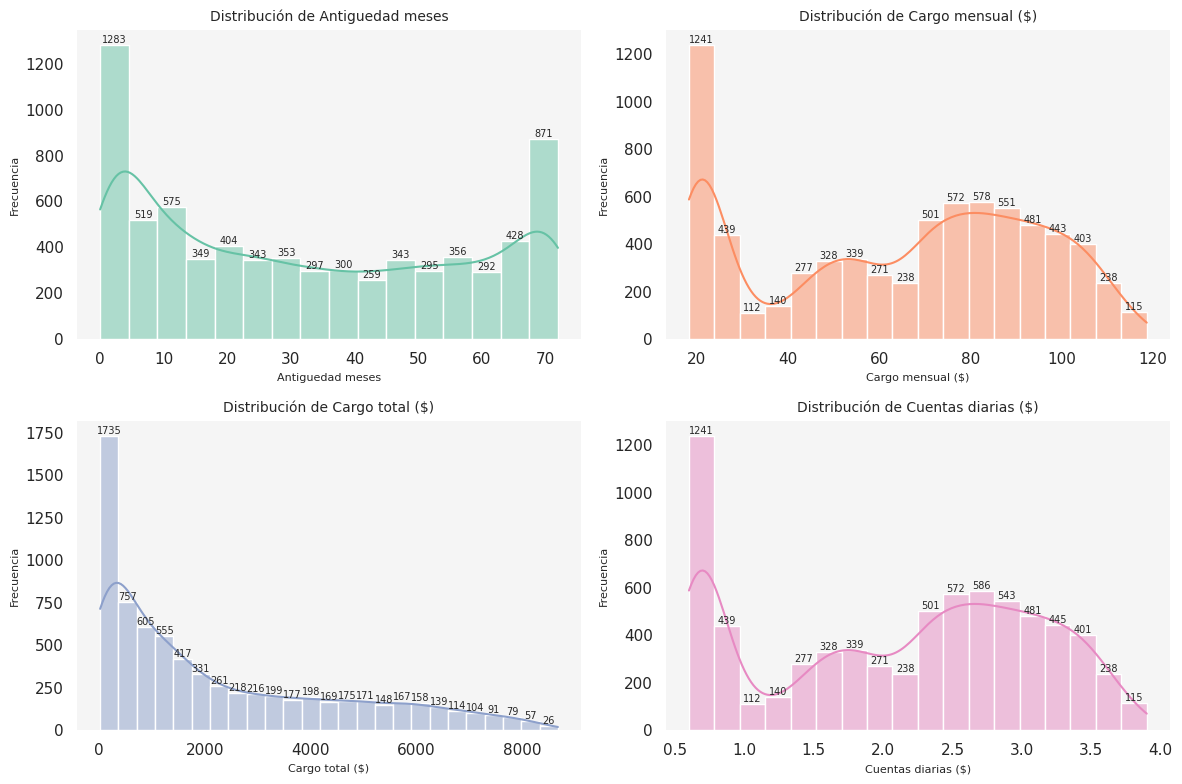

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df['Cargo_total'] = pd.to_numeric(df['Cargo_total'], errors='coerce')
df['Cargo_mensual'] = pd.to_numeric(df['Cargo_mensual'], errors='coerce')
df['Antiguedad_meses'] = pd.to_numeric(df['Antiguedad_meses'], errors='coerce')
df['Cuentas_diarias'] = pd.to_numeric(df['Cuentas_diarias'], errors='coerce')

variables_numericas = ['Antiguedad_meses', 'Cargo_mensual', 'Cargo_total', 'Cuentas_diarias']

colores = sns.color_palette("Set2", len(variables_numericas))

variables_con_dinero = ['Cargo_mensual', 'Cargo_total', 'Cuentas_diarias']

n = len(variables_numericas)
ncols = 2
nrows = (n + 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(variables_numericas):

    hist = sns.histplot(
        data=df,
        x=col,
        kde=True,
        color=colores[i],
        ax=axes[i]
    )

    for patch in hist.patches:
        height = patch.get_height()
        if not np.isnan(height) and height > 0:
            x = patch.get_x() + patch.get_width() / 2
            y = height
            axes[i].text(x, y, int(height), ha='center', va='bottom', fontsize=7)

    etiqueta_x = col.replace("_", " ")
    if col in variables_con_dinero:
        etiqueta_x += " ($)"

    axes[i].set_title(f'Distribución de {etiqueta_x}', fontsize=10)
    axes[i].set_xlabel(etiqueta_x, fontsize=8)
    axes[i].set_ylabel('Frecuencia', fontsize=8)
    axes[i].grid(False)
    axes[i].set_facecolor('#f5f5f5')
    for spine in axes[i].spines.values():
        spine.set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### 4.1.2 Descripcion de la Columna Cliente_senior

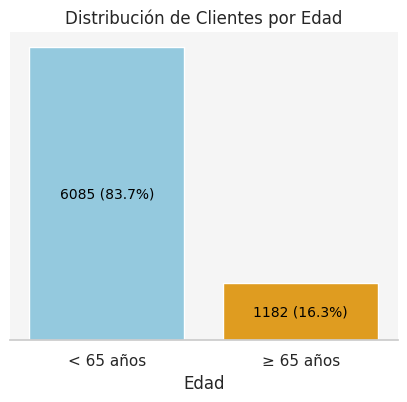

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Edad_categoria'] = df['Cliente_senior'].map({1: '≥ 65 años', 0: '< 65 años'})

total = len(df)

plt.figure(figsize=(5, 4))
ax = sns.countplot(
    x='Edad_categoria',
    hue='Edad_categoria',
    data=df,
    order=['< 65 años', '≥ 65 años'],
    palette=['skyblue', 'orange'],
    legend=False
)

ax.grid(False)
ax.set_facecolor('#f5f5f5')
plt.gca().set_facecolor('#f5f5f5')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('')
ax.set_yticks([])
ax.spines['left'].set_visible(False)

for p in ax.patches:
    altura = p.get_height()
    porcentaje = altura / total * 100
    ax.annotate(
        f'{int(altura)} ({porcentaje:.1f}%)',
        (p.get_x() + p.get_width() / 2, altura / 2),
        ha='center', va='center', color='black', fontsize=10
    )
plt.title('Distribución de Clientes por Edad')
plt.xlabel('Edad')
plt.show()

### 4.2. Descripcion Columnas Categoricas.

Las columnas categoricas son aquellas que el tipo de datos es object, es decir es un texto, como si o no, u otra informacion.

In [98]:
descripcion_Col_categorica = df[['Genero','Tiene_pareja', 'Tiene_dependientes',
  'Servicio_telefonico', 'Multiples_lineas_telefonicas','Servicio_internet',
'Seguridad_en_línea_Internet','Respaldo_en_línea_Internet', 'Proteccion_de_dispositivos_Internet',
'Soporte_tecnico_Internet', 'Streaming_TV_Internet','Streaming_peliculas_Internet',
'Tipo_de_contrato', 'Facturacion_on_line', 'Metodo_de_pago']].describe().T


In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_multiple_categorical(df, columns, palettes=None, figsize=(5, 5), ncols=2):
    nplots = len(columns)
    nrows = (nplots + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()
    total = len(df)

    for i, col in enumerate(columns):
        ax = axes[i]
        palette = palettes[i] if palettes and i < len(palettes) else 'muted'
        sns.countplot(data=df, x=col, hue=col, palette=palette, legend=False, ax=ax)
        ax.set_facecolor('#f5f5f5')

        for p in ax.patches:
            altura = p.get_height()
            porcentaje = altura / total * 100
            texto = f'{altura}\n({porcentaje:.1f}%)'
            ax.annotate(
                texto,
                (p.get_x() + p.get_width() / 2., altura * 0.6),
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )

        for label in ax.get_xticklabels():
            label.set_fontsize(8)
            if col == 'Metodo_de_pago':
                label.set_rotation(25)

        ax.set_title(f'Distribución de {col.replace("_", " ")}', fontsize=12)
        ax.set_xlabel(col.replace("_", " "), fontsize=10)
        ax.set_ylabel('Clientes', fontsize=10)
        ax.grid(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    # Eliminar ejes extra si hay más subplots que variables
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

### 4.2.1.Descripcion de las Columnas: Genero, Tipo de Contrato y Metodo de Pago.

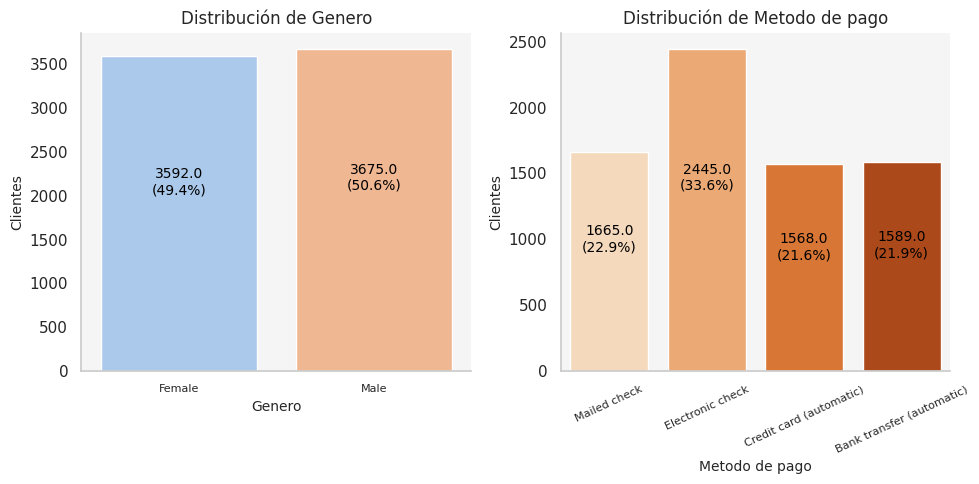

In [100]:
cols = ['Genero','Metodo_de_pago']
palettes = ['pastel', 'Oranges']

plot_multiple_categorical(df, cols, palettes, figsize=(10,5), ncols=2)

### 4.2.2.Descripcion de Variables Tiene Pareja, Tiene Dependientes y Servicio Telefonico y Multiples lineas telefonicas

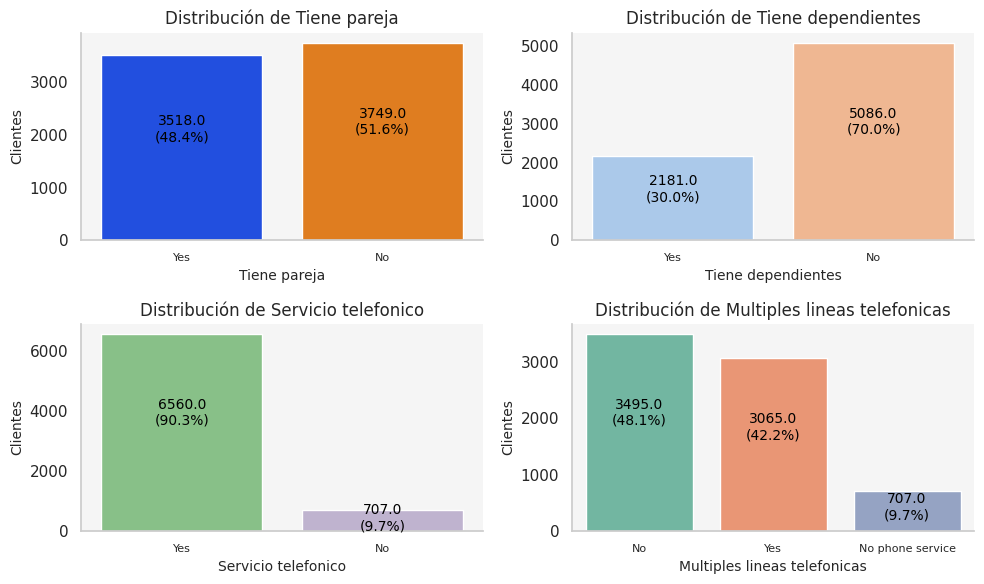

In [101]:
cols = ['Tiene_pareja', 'Tiene_dependientes','Servicio_telefonico','Multiples_lineas_telefonicas']
palettes = ['bright', 'pastel', 'Accent', 'Set2']

plot_multiple_categorical(df, cols, palettes, figsize=(10,6), ncols=2)

### 4.2.3. Descripcion Variables Streaming TV Internet, Streaming peliculas Internet, Tipo de Contrato y Facturacion OnLine.

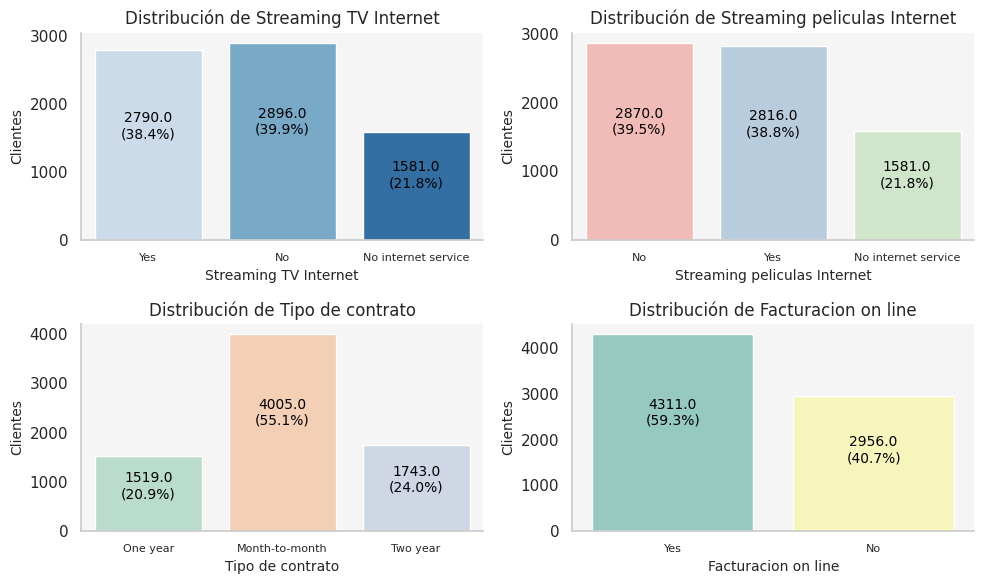

In [102]:
cols = ['Streaming_TV_Internet','Streaming_peliculas_Internet','Tipo_de_contrato','Facturacion_on_line']
palettes = ['Blues', 'Pastel1', 'Pastel2' ,'Set3']

plot_multiple_categorical(df, cols, palettes, figsize=(10,6), ncols=2)


 ### 4.2.4. Descripcion de variables  Servicio de Internet, Soporte Tecnico Internet, Proteccion dispositivos Internet y Respaldo en linea Internet.


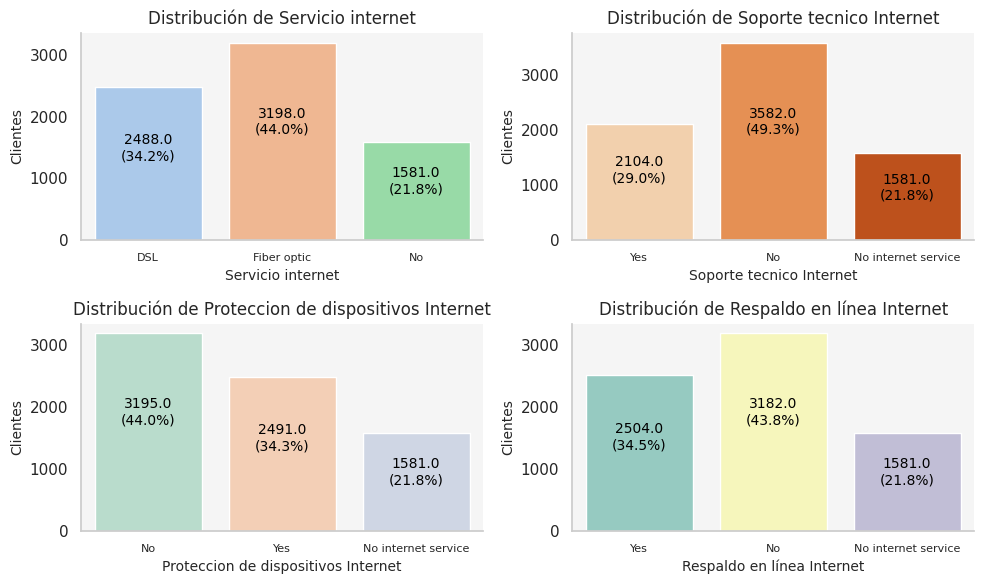

In [103]:
cols = ['Servicio_internet','Soporte_tecnico_Internet','Proteccion_de_dispositivos_Internet','Respaldo_en_línea_Internet']
palettes = ['pastel', 'Oranges', 'Pastel2', 'Set3']

plot_multiple_categorical(df, cols, palettes, figsize=(10,6), ncols=2)

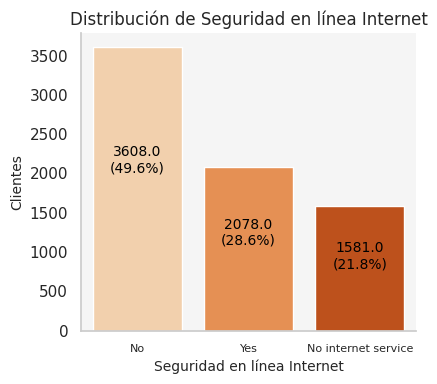

In [104]:
cols = ['Seguridad_en_línea_Internet']
palettes = ['Oranges']

plot_multiple_categorical(df, cols, palettes, figsize=(8,4), ncols=2)

# 5. Visualizacion de la Evasion ( Churn ) ( Abandono_cliente)

En este punto  determinará cuales son las variables que influyen en el abandono de clientes (Churn)

A partir de ahora las columnas se identificaran como variables , ya que se debe determinar cual o cuales intervienen en el abandono de los clientes (churn)

### 5.1 Proporcion de clientes que  abandonan y los que permanecen

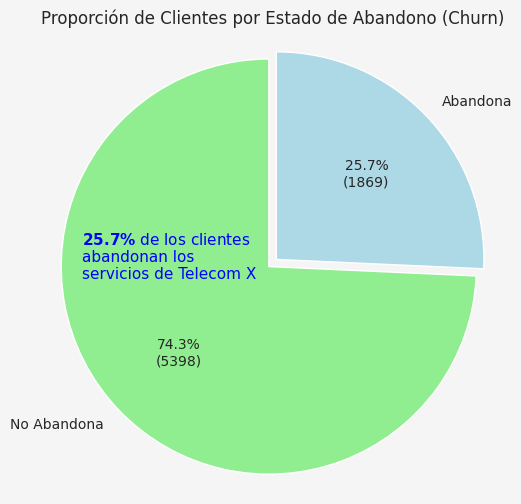

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = df['Abandono_cliente'].value_counts()
churn_percentages = df['Abandono_cliente'].value_counts(normalize=True) * 100
churn_rate = churn_percentages.get(1, 0)

churn_map = {0: 'No Abandona', 1: 'Abandona'}
labels_for_plot = [churn_map[idx] for idx in churn_counts.index]

def autopct_format_func(pct):
    total = sum(churn_counts)
    val = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({val})'

fig, ax = plt.subplots(figsize=(6, 6), facecolor='#f5f5f5')

wedges, texts, autotexts = ax.pie(
    x=churn_counts,
    labels=labels_for_plot,
    autopct=autopct_format_func,
    colors=['lightgreen', 'lightblue'],
    startangle=90,
    explode=(0, 0.05),
    textprops={'fontsize': 10}
)
texto = (
    "$\\bf{" + f"{churn_rate:.1f}" + "\\%}$ de los clientes\n"
    "abandonan los\n"
    "servicios de Telecom X"
)
ax.text(-0.9, 0.05, texto, ha='left', va='center', fontsize=11, color='blue')

plt.title('Proporción de Clientes por Estado de Abandono (Churn)', fontsize=12)

plt.axis('equal')
plt.show()

### 5.2 Analisis de Variables  Numericas.

In [106]:
#Descripcion estadistica de Columnas Numericas

descripcion_Col_numerica = df[['Antiguedad_meses', 'Cargo_mensual', 'Cargo_total', 'Cuentas_diarias']].describe().T
descripcion_Col_numerica

,count,mean,std,min,25%,50%,75%,max
Antiguedad_meses,7267.0,32.346498,24.571773,0.00000,9.000000,29.000000,55.00000,72.000000
Cargo_mensual,7267.0,64.720098,30.129572,18.25000,35.425000,70.300000,89.87500,118.750000
Cargo_total,7267.0,2280.634213,2266.915104,18.80000,401.400000,1394.550000,3778.52500,8684.800000
Cuentas_diarias,7267.0,2.126153,0.989802,0.59954,1.163765,2.309461,2.95253,3.901117


5.2.1.Descripcion Estadistica de Variables Numericas.

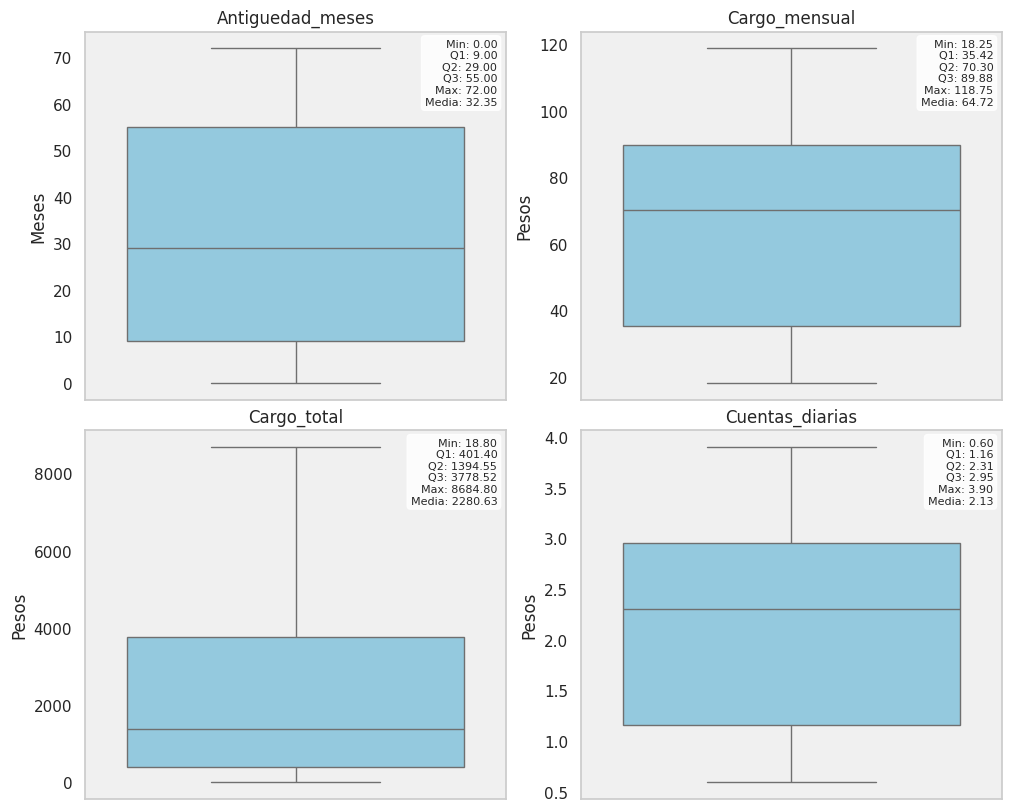

In [107]:

import seaborn as sns
import matplotlib.pyplot as plt

columnas = ['Antiguedad_meses', 'Cargo_mensual', 'Cargo_total', 'Cuentas_diarias']

# Etiquetas personalizadas del eje Y
etiquetas_y = {
    'Antiguedad_meses': 'Meses',
    'Cargo_mensual': 'Pesos',
    'Cargo_total': 'Pesos',
    'Cuentas_diarias': 'Pesos'
}

fig, axes = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(columnas):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)
    axes[i].set_ylabel(etiquetas_y[col])
    axes[i].grid(False)

# Fondo gris claro
    axes[i].set_facecolor('#f0f0f0')

    stats = df[col].describe()
    texto = (
        f"Min: {stats['min']:.2f}\n"
        f"Q1: {stats['25%']:.2f}\n"
        f"Q2: {stats['50%']:.2f}\n"
        f"Q3: {stats['75%']:.2f}\n"
        f"Max: {stats['max']:.2f}\n"
        f"Media: {stats['mean']:.2f}"
    )

    axes[i].text(
        0.98, 0.98, texto,
        ha='right', va='top',
        transform=axes[i].transAxes,
        fontsize=8,
        bbox=dict(facecolor='white', alpha=0.85, boxstyle='round')
    )

plt.show()

### 5.2.2 Analisis de Correlacion para Variables Numericas

La matriz de correlación es una herramienta estadística que muestra la fuerza y dirección de la relación lineal entre variables numéricas.

Cada celda en la matriz representa el coeficiente de correlación de Pearson entre dos variables. Este coeficiente varía entre:0 y 1.0. Donde 0.0 no existe correlacion y 1.0 hay una correlacion perfecta positiva, es decir hay una incidencia de esta variable en la variable en estudio.

Se usará esta herramienta estadistica para determinar cual es la variable que mas incide en el abandono de clientes (Churn).

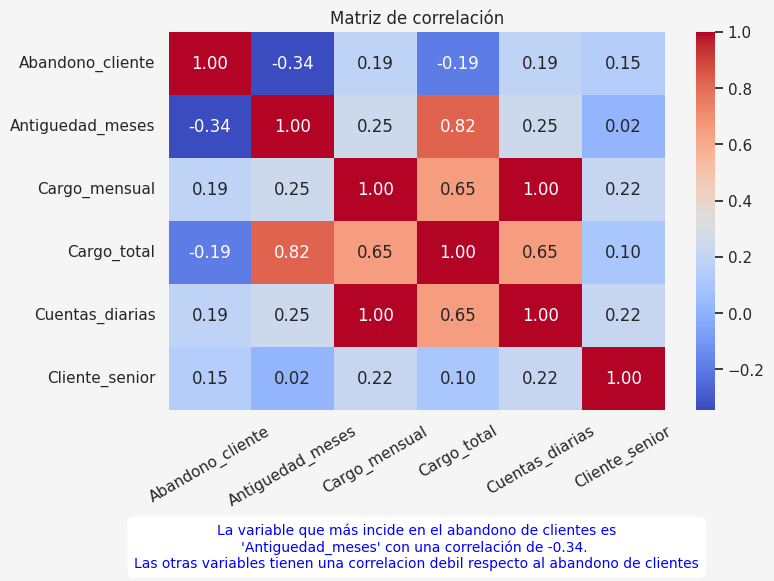

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Abandono_cliente'] = df['Abandono_cliente'].astype(int)

variables = ['Abandono_cliente', 'Antiguedad_meses', 'Cargo_mensual', 'Cargo_total', 'Cuentas_diarias', 'Cliente_senior']
correlaciones = df[variables].corr()

plt.figure(figsize=(8, 6))
ax = sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
ax.set_facecolor('#f5f5f5')
plt.gca().set_facecolor('#f5f5f5')
plt.gcf().set_facecolor('#f5f5f5')
plt.xticks(rotation=30)
plt.title("Matriz de correlación")

plt.subplots_adjust(bottom=0.25)
plt.text(
    0.5, -0.30,
    "La variable que más incide en el abandono de clientes es\n"
    "'Antiguedad_meses' con una correlación de -0.34. \nLas otras variables tienen una correlacion debil respecto al abandono de clientes",
    ha='center', va='top',
    fontsize=10, color='blue',
    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'),
    transform=plt.gca().transAxes
)

plt.show()

### 5.2.3 Relacion entre Antiguedad del cliente y abandono de clientes (Churn).

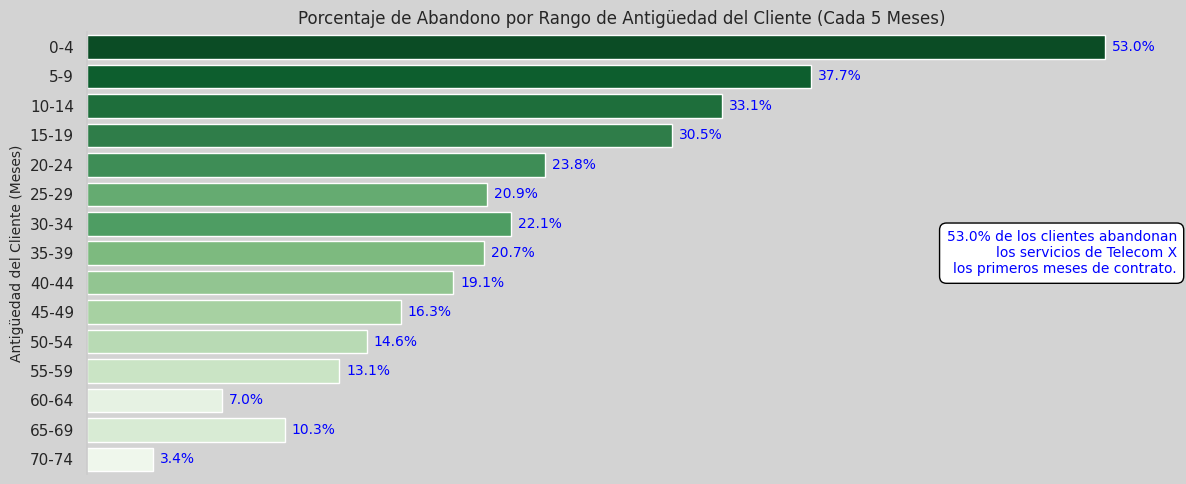

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

bins = np.arange(0, df['Antiguedad_meses'].max() + 6, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]

df['Antiguedad_meses_rango'] = pd.cut(
    df['Antiguedad_meses'], bins=bins, labels=labels, right=False, include_lowest=True)

churn_counts = pd.crosstab(df['Antiguedad_meses_rango'], df['Abandono_cliente'])
churn_percentages = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100
percentage_churned = churn_percentages[1].sort_values(ascending=False)

colors = sns.color_palette("Greens", len(percentage_churned))[::-1]
paleta = {index: colors[i] for i, index in enumerate(percentage_churned.index)}

fig, ax = plt.subplots(figsize=(12, 5), facecolor='lightgrey')
ax.set_facecolor('lightgrey')

sns.barplot(
    x=percentage_churned.values,
    y=percentage_churned.index,
    hue=percentage_churned.index,
    palette=paleta,
    dodge=False,
    legend=False
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('Antigüedad del Cliente (Meses)', fontsize=10)
ax.set_title('Porcentaje de Abandono por Rango de Antigüedad del Cliente (Cada 5 Meses)', fontsize=12)
ax.set_xticks([])

for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}%',
                xy=(p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left', va='center',
                fontsize=10,
                color='blue')

ax.text(1.02, 0.5,
        '53.0% de los clientes abandonan\nlos servicios de Telecom X\n'
        'los primeros meses de contrato.',
        transform=ax.transAxes,
        fontsize=10,
        color='blue',
        ha='right',
        va='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

### 5.2.4. Relacion entre Cargo Mensual, Cargo Total y Cuentas Diarias con  Abandono de Clientes (churn).

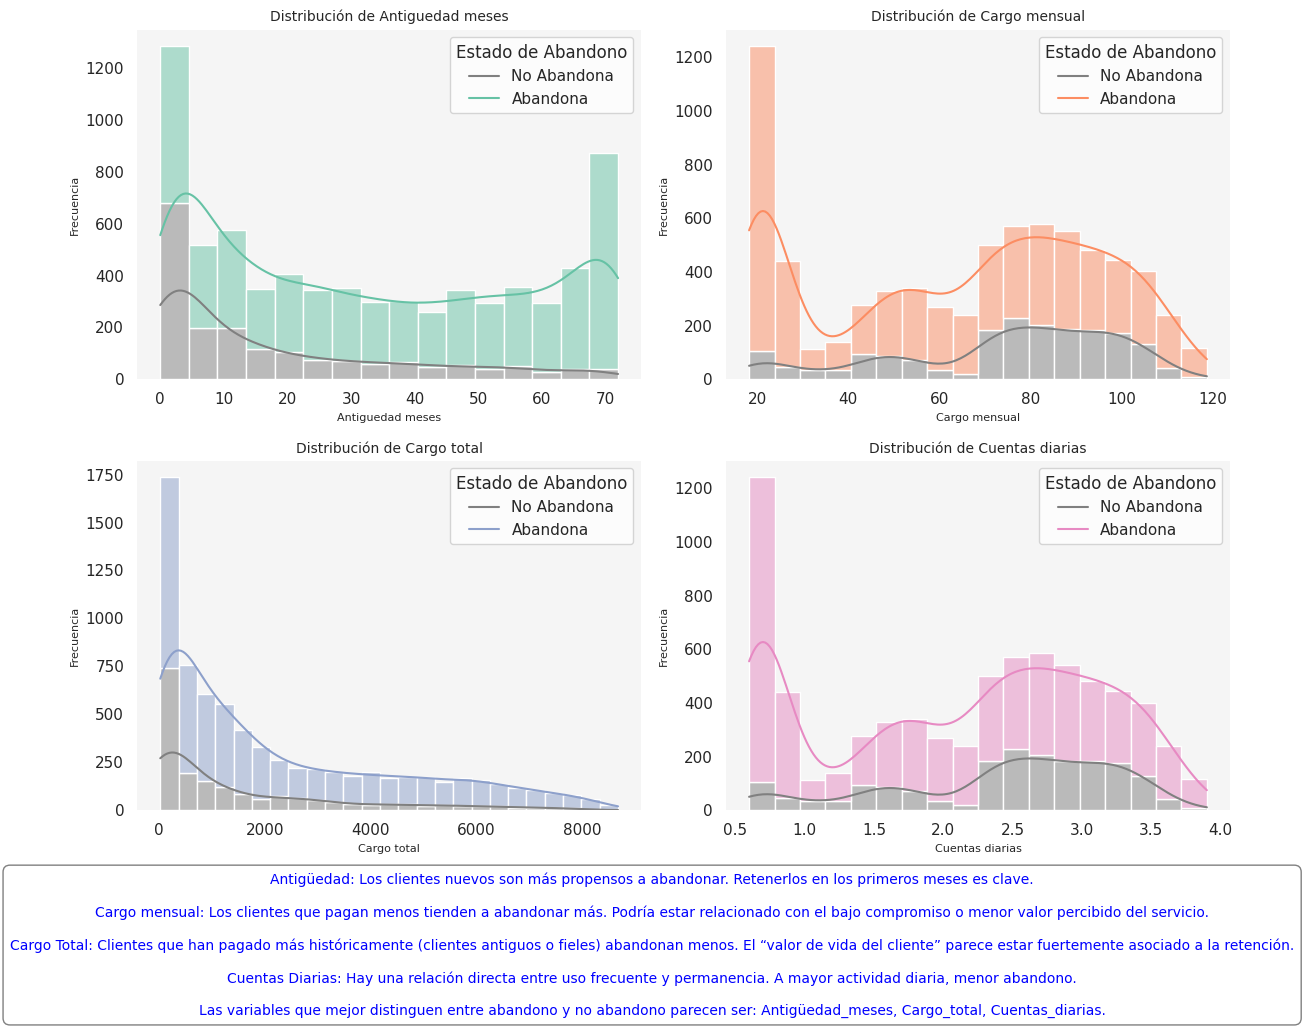

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asegurar tipo numérico
df['Cargo_total'] = pd.to_numeric(df['Cargo_total'], errors='coerce')
df['Cargo_mensual'] = pd.to_numeric(df['Cargo_mensual'], errors='coerce')
df['Antiguedad_meses'] = pd.to_numeric(df['Antiguedad_meses'], errors='coerce')
df['Cuentas_diarias'] = pd.to_numeric(df['Cuentas_diarias'], errors='coerce')

variables_numericas = ['Antiguedad_meses', 'Cargo_mensual', 'Cargo_total', 'Cuentas_diarias']

colores = sns.color_palette("Set2", len(variables_numericas))
paletas = [[color, 'gray'] for color in colores]

n = len(variables_numericas)
ncols = 2
nrows = (n + 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(variables_numericas):
    sns.histplot(
        data=df,
        x=col,
        hue='Abandono_cliente',
        multiple='stack',
        kde=True,
        palette=paletas[i],
        ax=axes[i]
    )

    legend = axes[i].legend(title='Estado de Abandono', labels=['No Abandona', 'Abandona'])
    if legend:
        legend.set_title('Estado de Abandono', prop={'size': 8})
        for text in legend.get_texts():
            text.set_fontsize(8)

    axes[i].set_title(f'Distribución de {col.replace("_", " ")}', fontsize=10)
    axes[i].set_xlabel(col.replace("_", " "), fontsize=8)
    axes[i].set_ylabel('Frecuencia', fontsize=8)
    axes[i].legend(title='Estado de Abandono', labels=['No Abandona', 'Abandona'])
    axes[i].grid(False)
    axes[i].set_facecolor('#f5f5f5')

    for spine in axes[i].spines.values():
        spine.set_visible(False)

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Añadir cuadro de texto con interpretación
texto = (
    "Antigüedad: Los clientes nuevos son más propensos a abandonar. Retenerlos en los primeros meses es clave.\n\n"
    "Cargo mensual: Los clientes que pagan menos tienden a abandonar más. Podría estar relacionado con el bajo compromiso o menor valor percibido del servicio.\n\n"
    "Cargo Total: Clientes que han pagado más históricamente (clientes antiguos o fieles) abandonan menos. El “valor de vida del cliente” parece estar fuertemente asociado a la retención.\n\n"
    "Cuentas Diarias: Hay una relación directa entre uso frecuente y permanencia. A mayor actividad diaria, menor abandono.\n\n"
    "Las variables que mejor distinguen entre abandono y no abandono parecen ser: Antigüedad_meses, Cargo_total, Cuentas_diarias."
)

fig.text(
    0.5, 0.12, texto,
    ha='center',
    va='top',
    fontsize=10,
    color='blue',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.tight_layout(rect=[0, 0.12, 1, 1])
plt.show()

### 5.3  Analisis de de Correlacion de Variables  Categoricas

### 5.3.1  Prueba V de Cramer para Variables Categoricas

In [111]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

variables_categoricas = [
    'Genero', 'Tiene_pareja', 'Tiene_dependientes', 'Servicio_telefonico',
    'Multiples_lineas_telefonicas', 'Servicio_internet', 'Seguridad_en_línea_Internet',
    'Respaldo_en_línea_Internet','Proteccion_de_dispositivos_Internet','Soporte_tecnico_Internet',
    'Streaming_TV_Internet','Streaming_peliculas_Internet', 'Tipo_de_contrato', 'Facturacion_on_line',
    'Metodo_de_pago'
]

def cramers_v(var1, var2):
    tabla = pd.crosstab(var1, var2)
    chi2, p, dof, expected = chi2_contingency(tabla)
    n = tabla.sum().sum()
    min_dim = min(tabla.shape) - 1
    if min_dim == 0:
        return np.nan
    return np.sqrt(chi2 / (n * min_dim)), chi2, p

resultados = []

for var in variables_categoricas:
    v, chi2, p = cramers_v(df[var], df['Abandono_cliente'])
    resultados.append({
        'Variable': var,
        'Chi2': round(chi2, 3),
        'p-valor': round(p, 4),
        'V_de_Cramer': round(v, 3)
    })

resumen = pd.DataFrame(resultados)
resumen = resumen.sort_values(by='V_de_Cramer', ascending=False)
print(resumen)

                               Variable      Chi2  p-valor  V_de_Cramer
12                     Tipo_de_contrato  1165.578   0.0000        0.400
6           Seguridad_en_línea_Internet   842.088   0.0000        0.340
9              Soporte_tecnico_Internet   820.714   0.0000        0.336
5                     Servicio_internet   722.801   0.0000        0.315
14                       Metodo_de_pago   636.723   0.0000        0.296
7            Respaldo_en_línea_Internet   598.833   0.0000        0.287
8   Proteccion_de_dispositivos_Internet   552.925   0.0000        0.276
11         Streaming_peliculas_Internet   374.623   0.0000        0.227
10                Streaming_TV_Internet   373.152   0.0000        0.227
13                  Facturacion_on_line   252.343   0.0000        0.186
2                    Tiene_dependientes   188.462   0.0000        0.161
1                          Tiene_pareja   159.675   0.0000        0.148
4          Multiples_lineas_telefonicas    11.267   0.0036      

### 5.3.1.1 Visualizacion de Prueba V de Cramér para variables categóricas.

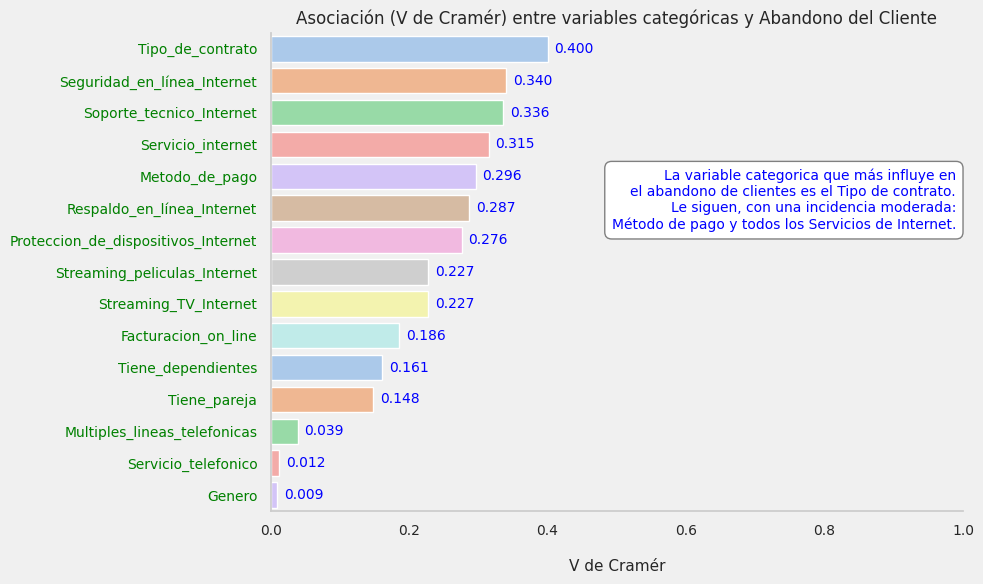

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#f0f0f0')

barplot = sns.barplot(
    x='V_de_Cramer',
    y='Variable',
    data=resumen,
    hue='Variable',
    palette='pastel',
    legend=False,
    ax=ax,
    )
ax.set_ylabel('')

for i, v in enumerate(resumen['V_de_Cramer']):
    ax.text(
        v + 0.01, i, f'{v:.3f}', color='blue', va='center', fontsize=10
    )
ax.set_title('Asociación (V de Cramér) entre variables categóricas y Abandono del Cliente', fontsize=12)
ax.set_xlabel('V de Cramér', fontsize=11, labelpad=15)
ax.set_xlim(0, 1)
ax.set_facecolor('#f0f0f0')
fig.patch.set_facecolor('#f0f0f0')
ax.tick_params(axis='both', labelsize=10)

for label in ax.get_yticklabels():
    label.set_fontsize(10)
    label.set_color('green')


ax.grid(False, axis='x')

for spine in ax.spines.values():
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


texto = (
    "La variable categorica que más influye en\n"
    "el abandono de clientes es el Tipo de contrato.\n"
    "Le siguen, con una incidencia moderada:\n"
    "Método de pago y todos los Servicios de Internet."
)
ax.text(
    0.99, 0.65, texto,
    transform=ax.transAxes,
    fontsize=10,
    color='blue',
    ha='right', va='center',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)
plt.tight_layout()
plt.show()

### 5.3.2 Relacion entre clientes que abandonan (Churn) y Tipo de Contrato (account_Contract).

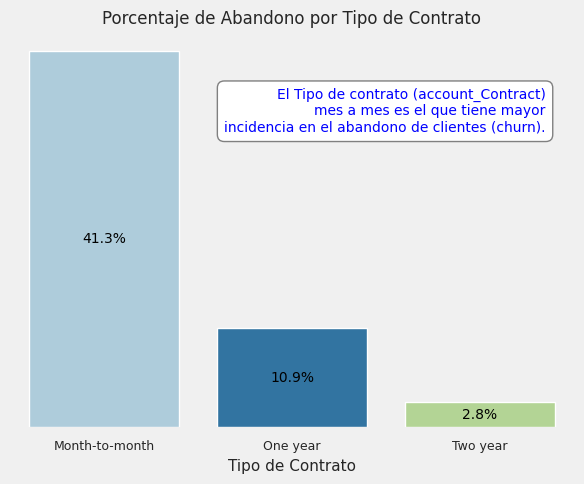

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_payment_counts = pd.crosstab(df['Tipo_de_contrato'], df['Abandono_cliente'])
churn_payment_percentages = churn_payment_counts.div(churn_payment_counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(6, 5), facecolor='#f0f0f0')
sns.barplot(
    x=churn_payment_percentages.index,
    y=churn_payment_percentages[1],
    hue=churn_payment_percentages.index,
    palette='Paired',
    legend=False,
    ax=ax
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', color='black', fontsize=10)

ax.set_title('Porcentaje de Abandono por Tipo de Contrato', fontsize=12)
ax.set_xlabel('Tipo de Contrato', fontsize=11)
ax.set_ylabel('')
ax.set_yticks([])
ax.set_yticklabels([])

ax.set_facecolor('#f0f0f0')
fig.patch.set_facecolor('#f0f0f0')
ax.tick_params(axis='y', left=False)
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
ax.grid(False)

plt.xticks(ha='center', fontsize=9)
texto = (
    "El Tipo de contrato (account_Contract)\n"
    "mes a mes es el que tiene mayor\n"
    "incidencia en el abandono de clientes (churn)."
)
ax.text(
    0.95, 0.8, texto,
    transform=ax.transAxes,
    fontsize=10,
    color='blue',
    ha='right', va='center',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)
plt.tight_layout()
plt.show()

### 5.3.3 Relacion de Servicios de Internet con el Abandono de Clientes (Churn)

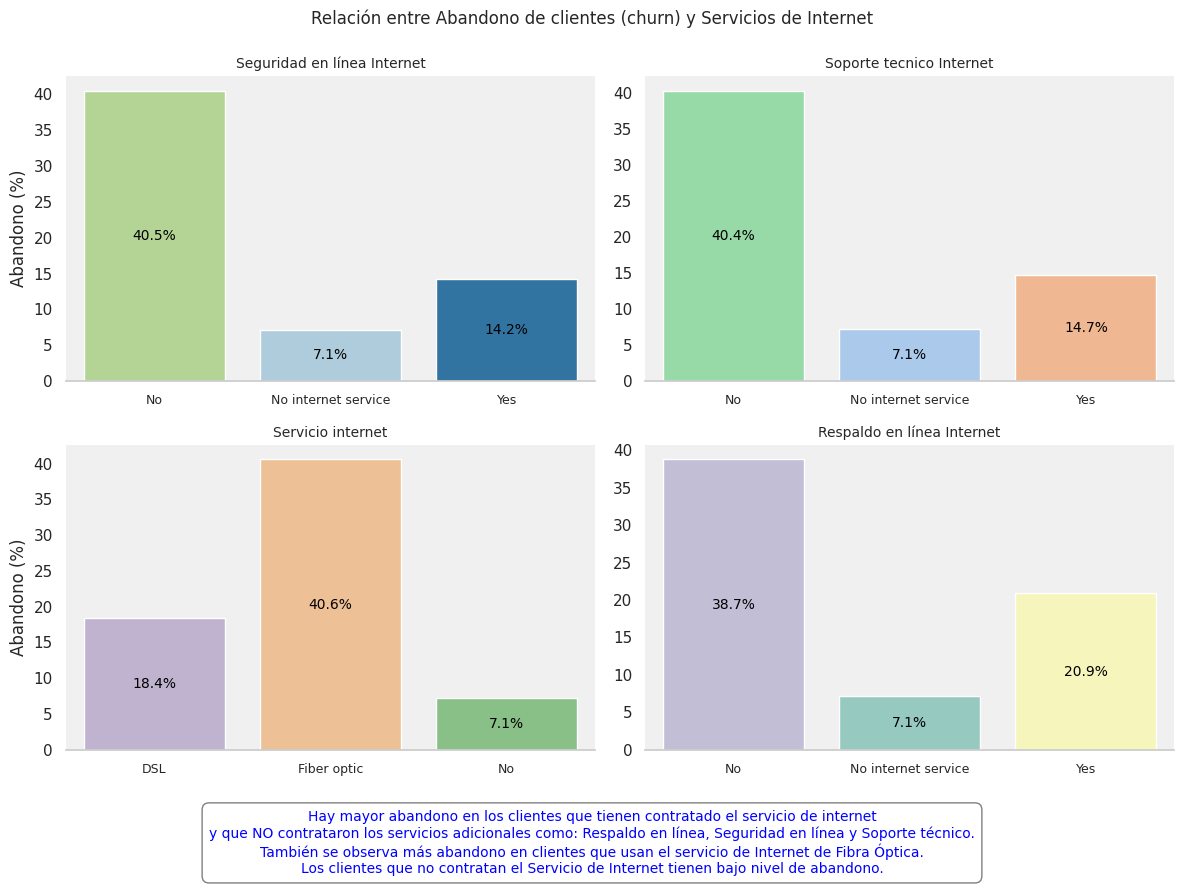

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

cols = [
    'Seguridad_en_línea_Internet',
    'Soporte_tecnico_Internet',
    'Servicio_internet',
    'Respaldo_en_línea_Internet'
]
paletas = ['Paired', 'pastel', 'Accent', 'Set3']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    counts = pd.crosstab(df[col], df['Abandono_cliente'])
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    tick_labels = percentages.index.tolist()
    abandonos = percentages[1].values

    n = len(abandonos)
    cmap = sns.color_palette(paletas[i], n)
    sorted_indices = np.argsort(abandonos)
    color_map = [None] * n
    for rank, idx in enumerate(sorted_indices):
        color_map[idx] = cmap[rank]

    ax = axes[i]
    bars = sns.barplot(
    x=percentages.index,
    y=percentages[1],
    hue=percentages.index,
    palette=color_map,
    ax=ax,
    legend=False
)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center', color='black', fontsize=10)

    ax.set_title(col.replace('_', ' '), fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Abandono (%)' if i % 2 == 0 else '')
    ax.set_facecolor('#f0f0f0')
    ax.tick_params(axis='x',  labelsize=9)

    sns.despine(ax=ax, top=True, right=True, left=True)
    ax.grid(False)

fig.suptitle('Relación entre Abandono de clientes (churn) y Servicios de Internet', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.99])

texto = (
    "Hay mayor abandono en los clientes que tienen contratado el servicio de internet\n"
    "y que NO contrataron los servicios adicionales como: Respaldo en línea, Seguridad en línea y Soporte técnico.\n"
    "También se observa más abandono en clientes que usan el servicio de Internet de Fibra Óptica.\n"
    "Los clientes que no contratan el Servicio de Internet tienen bajo nivel de abandono."
)

fig.text(
    0.5, -0.02, texto,
    ha='center', va='top',
    fontsize=10,
    color='blue',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.show()

### 5.3.4 Relacion entre Abandono de clientes (Churn) y clientes con Streaming Tv Internet y Streaming Peliculas Internet.

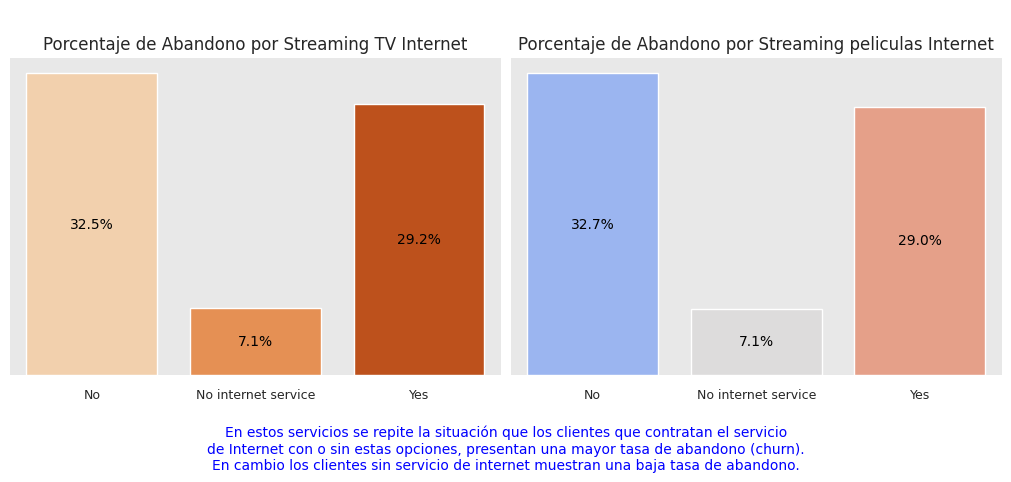

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Streaming_TV_Internet', 'Streaming_peliculas_Internet']
paletas = ['Oranges', 'coolwarm']

fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
for i, col in enumerate(cols):
    churn_counts = pd.crosstab(df[col], df['Abandono_cliente'])
    churn_percentages = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

    ax = axes[i]
    bars = sns.barplot(
        x=churn_percentages.index,
        y=churn_percentages[1],
        hue=churn_percentages.index,
        palette=paletas[i],
        legend=False,
        ax=ax
    )
    for container in bars.containers:
        bars.bar_label(container, fmt='%.1f%%', label_type='center', color='black', fontsize=10)
    ax.set_title(f'Porcentaje de Abandono por {col.replace("_", " ")}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Porcentaje de Clientes que Abandonan (%)', fontsize=10)

    plt.setp(ax.get_xticklabels(),  ha='center', fontsize=9)
    ax.set_facecolor('#e8e8e8')
    ax.grid(False)
    ax.yaxis.set_visible(False)
    for spine in ax.spines.values():
        spine.set_visible(False)

texto = ("En estos servicios se repite la situación que los clientes que contratan el servicio\n"
         "de Internet con o sin estas opciones, presentan una mayor tasa de abandono (churn).\n"
         "En cambio los clientes sin servicio de internet muestran una baja tasa de abandono.")

fig.suptitle(' ', fontsize=12)  # si quieres mantener espacio arriba para el texto
fig.text(0.5, -0.05, texto, ha='center', va='top', fontsize=10, color='blue',
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))

plt.show()

### 5.3.5. Relacion entre Metodo de Pago (account_PaymentMethod) y Abandono (Churn)

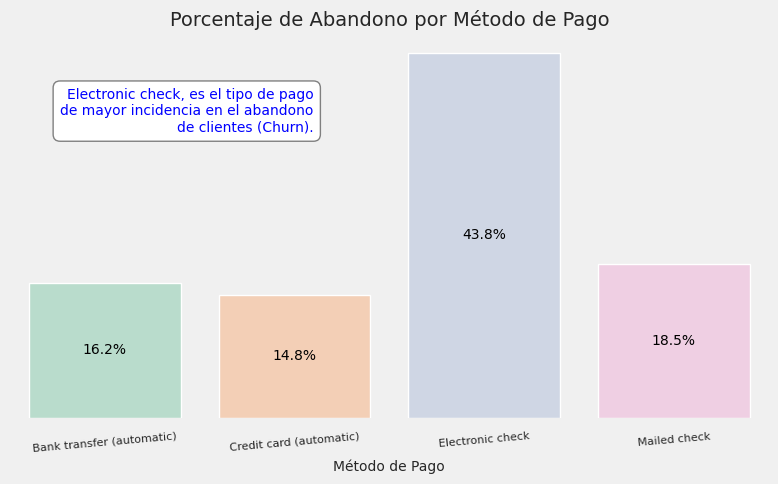

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_payment_counts = pd.crosstab(df['Metodo_de_pago'], df['Abandono_cliente'])
churn_payment_percentages = churn_payment_counts.div(churn_payment_counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(8, 5), facecolor='#f0f0f0')
sns.barplot(
    x=churn_payment_percentages.index,
    y=churn_payment_percentages[1],
    hue=churn_payment_percentages.index,
    palette='Pastel2',
    legend=False,
    ax=ax
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', color='black', fontsize=10)

ax.set_title('Porcentaje de Abandono por Método de Pago', fontsize=14)
ax.set_xlabel('Método de Pago', fontsize=10)
ax.set_ylabel('')
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_facecolor('#f0f0f0')
fig.patch.set_facecolor('#f0f0f0')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
ax.grid(False)
plt.xticks(rotation=5, ha='center', fontsize=8)

texto = (
    "Electronic check, es el tipo de pago\n"
    "de mayor incidencia en el abandono\n"
    "de clientes (Churn)."
)
ax.text(
    0.4, 0.8, texto,
    transform=ax.transAxes,
    fontsize=10,
    color='blue',
    ha='right', va='center',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)
plt.tight_layout()
plt.show()

# 6. Analisis Estadistico de Datos.

### 6.2. Regresion Logistica para Variables Numericas

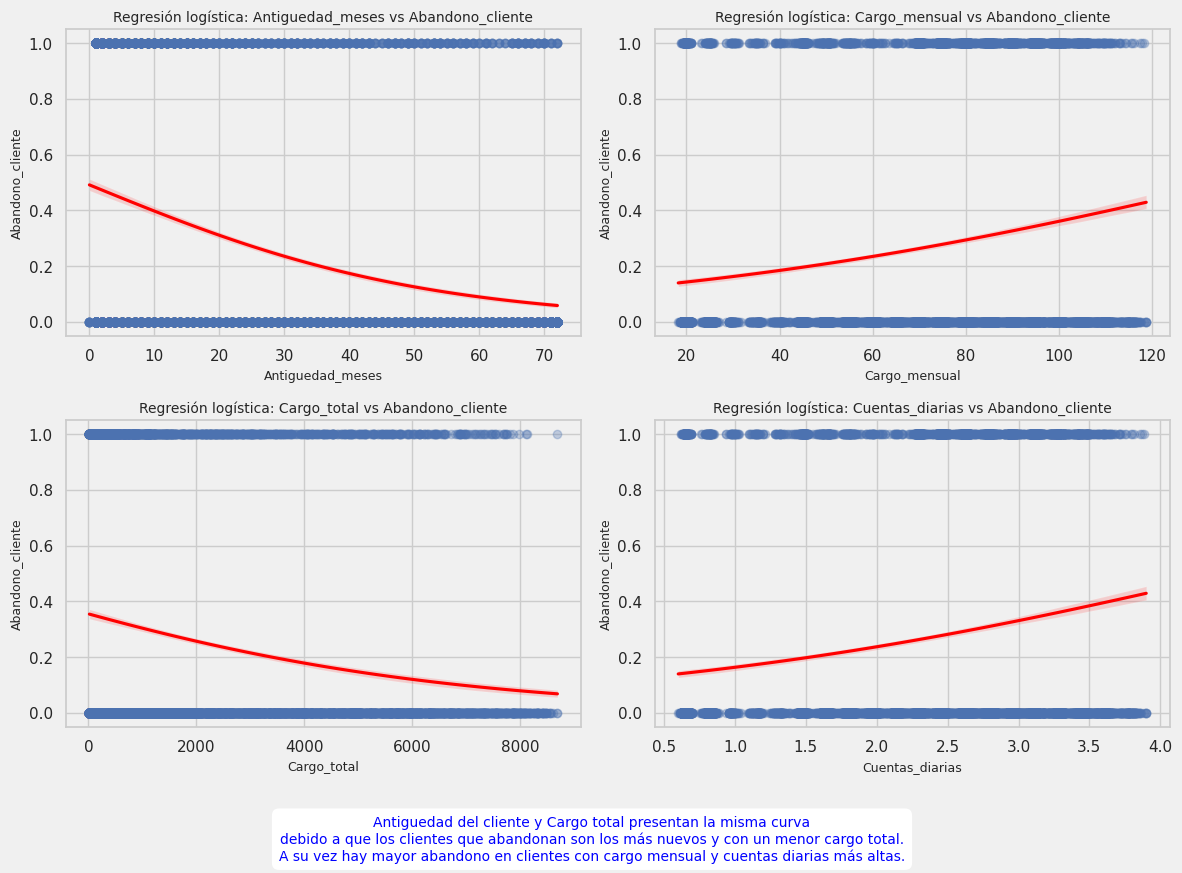

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
variables_numericas = ['Antiguedad_meses', 'Cargo_mensual', 'Cargo_total', 'Cuentas_diarias']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

fig.patch.set_facecolor('#f0f0f0')

texto = (
    "Antiguedad del cliente y Cargo total presentan la misma curva\n"
    "debido a que los clientes que abandonan son los más nuevos y con un menor cargo total.\n"
    "A su vez hay mayor abandono en clientes con cargo mensual y cuentas diarias más altas."
)

fig.text(
    0.5, -0.03,
    texto,
    ha='center', va='top',
    fontsize=10,
    color='blue',
    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5')
)

for i, var in enumerate(variables_numericas):
    sns.regplot(x=var, y='Abandono_cliente', data=df,
                logistic=True,
                scatter_kws={'alpha': 0.3},
                line_kws={'color': 'red'},
                ax=axes[i])
    axes[i].set_title(f"Regresión logística: {var} vs Abandono_cliente", fontsize=10)
    axes[i].set_xlabel(var, fontsize=9)
    axes[i].set_ylabel('Abandono_cliente', fontsize=9)

    axes[i].set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

## 7. Caracterizacion de clientes con antiguedad entre 0 a 8 meses que presentan mayor abandono.

### 7.1 Caracterizacion de Variable Antiguedad_meses.

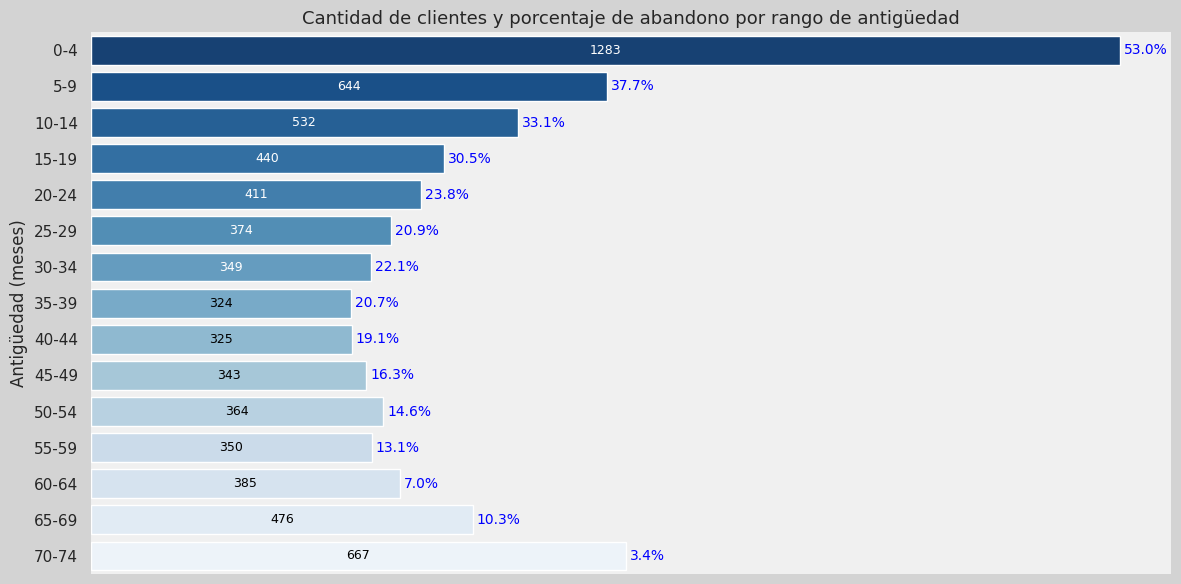

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

bins = np.arange(0, df['Antiguedad_meses'].max() + 6, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]

df['Rango_antiguedad'] = pd.cut(df['Antiguedad_meses'], bins=bins, labels=labels, right=False, include_lowest=True)
conteos = df['Rango_antiguedad'].value_counts().reindex(labels, fill_value=0)

churn_counts = pd.crosstab(df['Rango_antiguedad'], df['Abandono_cliente'])
churn_percentages = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100
percentage_churned = churn_percentages[1].reindex(labels, fill_value=0)

colors = sns.color_palette("Blues", len(conteos))[::-1]
fig, ax = plt.subplots(figsize=(12, 6), facecolor='lightgrey')
ax.set_facecolor('#f0f0f0')

sns.barplot(
    y=conteos.index,
    x=conteos.values,
    hue=conteos.index,
    palette=colors,
    dodge=False,
    orient='h',
    legend=False,
    ax=ax
)

for i, bar in enumerate(ax.patches):
    width = bar.get_width()
    ax.annotate(f'{int(width)}',
                xy=(width / 2, bar.get_y() + bar.get_height() / 2),
                ha='center', va='center',
                fontsize=9,
                color='white' if i < len(colors)//2 else 'black')

for i, bar in enumerate(ax.patches):
    percent = percentage_churned.iloc[i]
    ax.annotate(f'{percent:.1f}%',
                xy=(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2),
                ha='left', va='center',
                fontsize=10,
                color='blue')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)

ax.set_title("Cantidad de clientes y porcentaje de abandono por rango de antigüedad", fontsize=13)
ax.set_ylabel("Antigüedad (meses)")
ax.set_xlabel("")

plt.tight_layout()
plt.show()

### 7.2 Caracterizacion de los clientes del rango 0 a 8 meses de antiguedad.

Número de clientes con antigüedad entre 0 y 9 meses: 1927



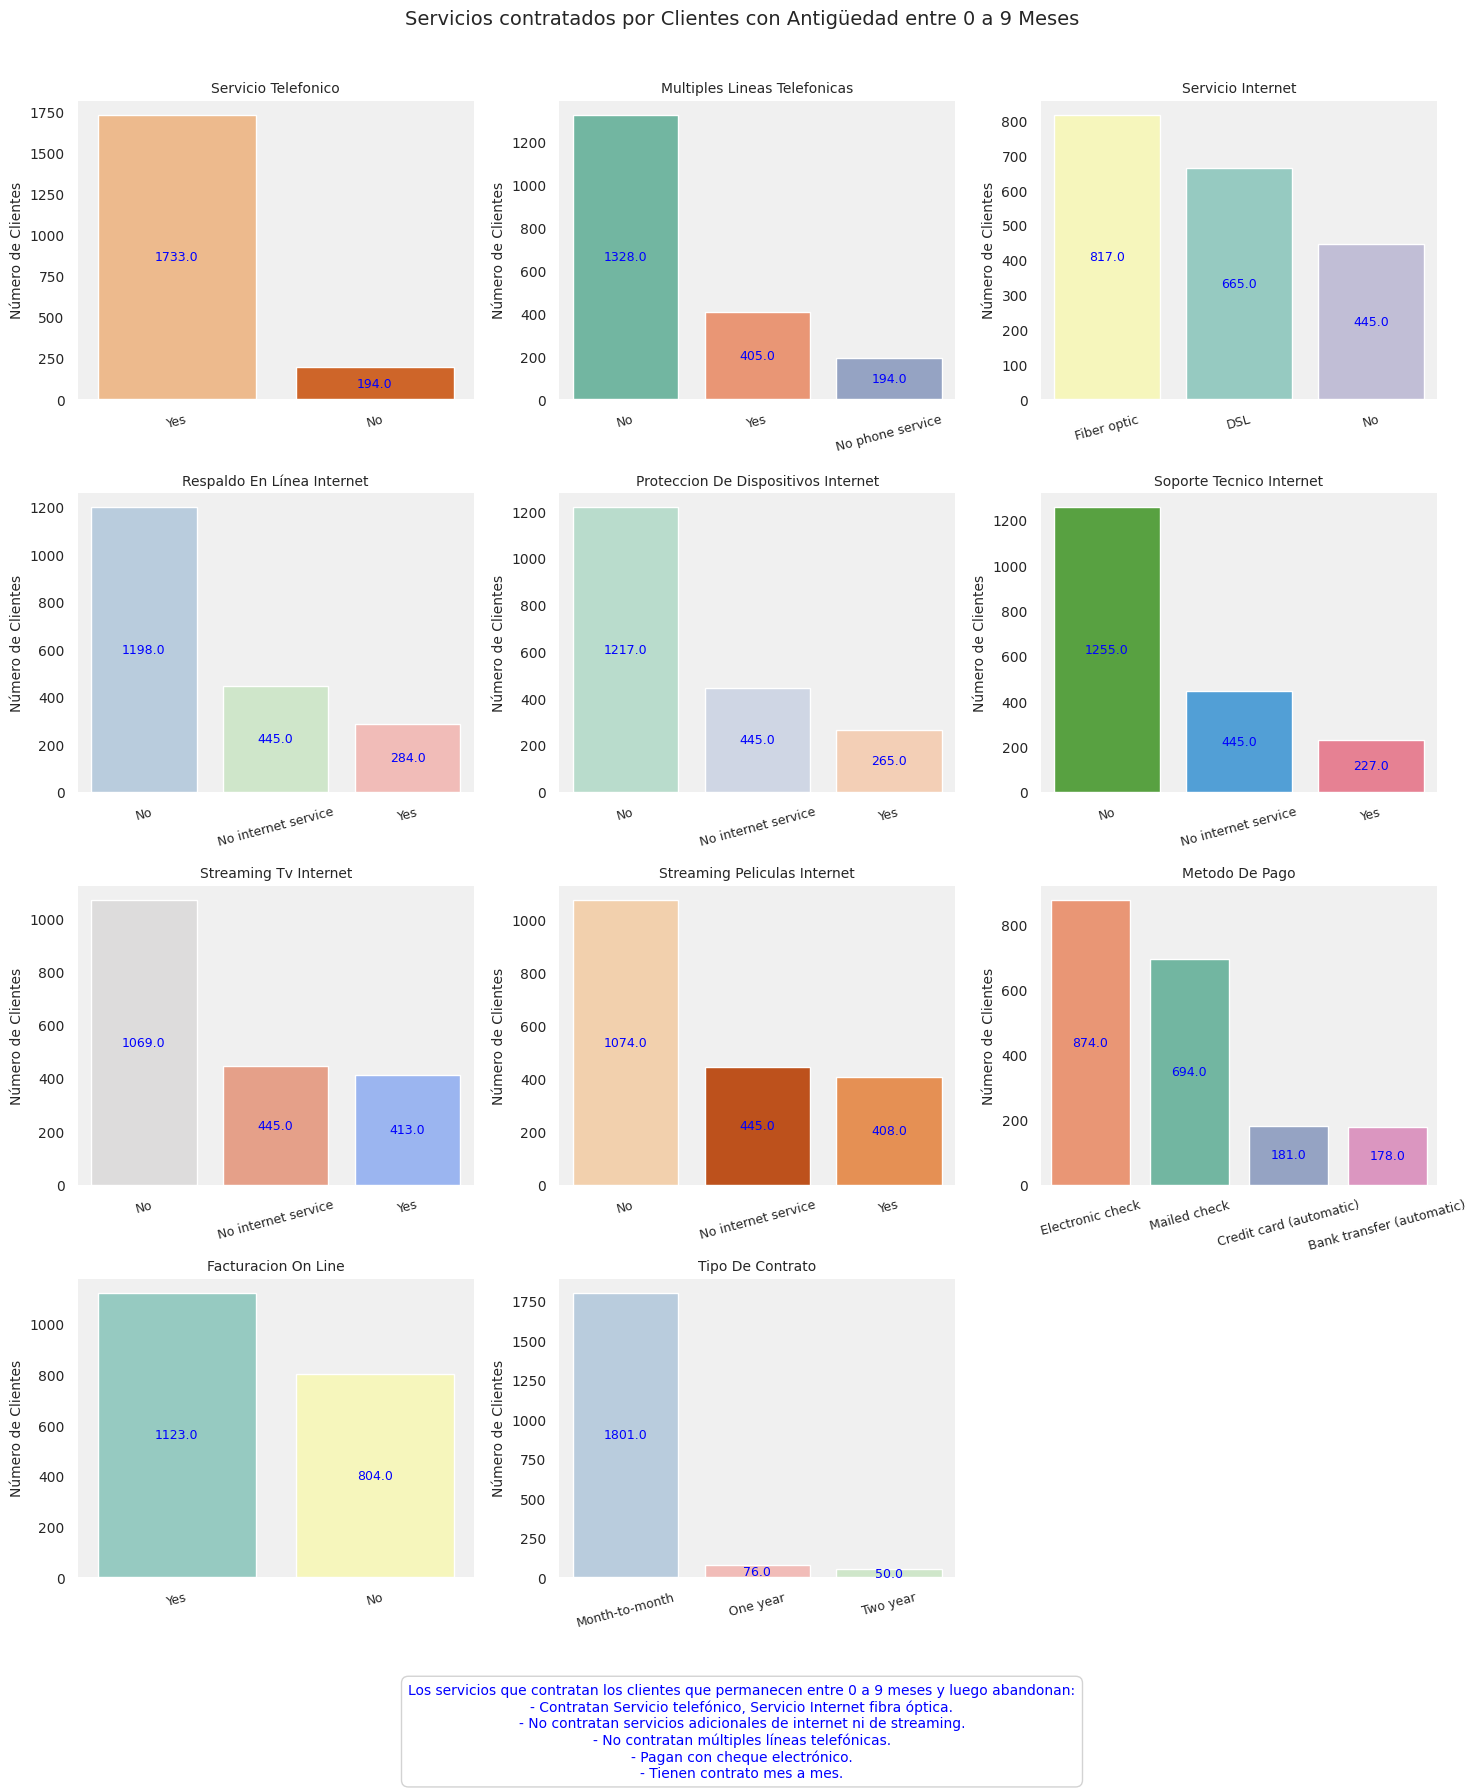

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

paletas = ["Oranges", "Set2", "Set3", "Pastel1", "Pastel2", "husl", "coolwarm"]

clientes_antiguedad_baja = df[(df['Antiguedad_meses'] >= 0) & (df['Antiguedad_meses'] < 10)]
print(f"Número de clientes con antigüedad entre 0 y 9 meses: {len(clientes_antiguedad_baja)}\n")

variables_interes = [
    'Servicio_telefonico',
    'Multiples_lineas_telefonicas',
    'Servicio_internet',
    'Respaldo_en_línea_Internet',
    'Proteccion_de_dispositivos_Internet',
    'Soporte_tecnico_Internet',
    'Streaming_TV_Internet',
    'Streaming_peliculas_Internet',
    'Metodo_de_pago',
    'Facturacion_on_line',
    'Tipo_de_contrato'
]

if not clientes_antiguedad_baja.empty:
    n_vars = len(variables_interes)
    n_cols = 3
    n_rows = (n_vars + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4 + 2))
    axes = axes.flatten()

    for i, var in enumerate(variables_interes):
        ax = axes[i]
        categorias = clientes_antiguedad_baja[var].value_counts().index
        num_categorias = len(categorias)

        paleta_actual = paletas[i % len(paletas)]
        palette = sns.color_palette(paleta_actual, n_colors=num_categorias)

        ax.set_facecolor('#f0f0f0')

        sns.countplot(
            data=clientes_antiguedad_baja,
            x=var,
            hue=var,
            palette=palette,
            order=categorias,
            legend=False,
            ax=ax
        )

        ax.set_title(f'{var.replace("_", " ").title()}', fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('Número de Clientes', fontsize=10)
        ax.tick_params(axis='x', rotation=15, labelsize=9)
        ax.tick_params(axis='y', labelsize=10)

        for spine in ax.spines.values():
            spine.set_visible(False)

        ax.grid(False)

        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.annotate(
                    f'{height}',
                    (p.get_x() + p.get_width() / 2., height / 2),
                    ha='center',
                    va='center',
                    fontsize=9,
                    color='blue'
                )

    for j in range(i + 1, len(axes)):
        axes[j].remove()

    resumen = (
        "Los servicios que contratan los clientes que permanecen entre 0 a 9 meses y luego abandonan:\n"
        "- Contratan Servicio telefónico, Servicio Internet fibra óptica.\n"
        "- No contratan servicios adicionales de internet ni de streaming.\n"
        "- No contratan múltiples líneas telefónicas.\n"
        "- Pagan con cheque electrónico.\n"
        "- Tienen contrato mes a mes."
    )

    fig.text(
        0.5, 0.05, resumen,
        ha='center',
        va='top',
        fontsize=10,
        color='blue',
        bbox=dict(facecolor='white', edgecolor='lightgray', boxstyle='round,pad=0.5')
    )

    plt.tight_layout(rect=[0, 0.07, 1, 0.95])
    plt.suptitle('Servicios contratados por Clientes con Antigüedad entre 0 a 9 Meses', fontsize=14, y=0.98)
    plt.show()

#📄Informe final

# 1. Introduccion.

La empresa de telecomunicaciones Telecom X, tiene como objetivo entregar servicios de telefonía, Internet y streaming.

En su operación se ha dado cuenta que existe una fuga de clientes y necesita en primer lugar cuantificar a cuánto asciende este churn o evasión de clientes.

Por otra parte, necesita conocer las causas de este abandono de clientes, con el objeto de tomar medidas para evitar que sus clientes se vayan a la competencia.

Para ello, nuestro desafío será recopilar, procesar y analizar los datos de la empresa Telecom X, para realizar los análisis necesarios y de allí extraer información valiosa.

A partir de este análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

# 2. Acciones Realizadas

#### 2.1 Extraccion de datos.

Los datos de la empresa TelecomX se obtuvieron de la siguiente url = https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json.

Como se observa, los datos estan el un archivo json, y corresponden a diccionarios anidados.

Utilizando el lenguaje Python y sus bibliotecas como Pandas, Numpy, se procedió a transformar este archivo en un dataframe, mediante codigo de aplanado de columnas anidadas.

####2.2 Transformacion y Limpieza de Datos.

Posteriormente, se transformó y a limpiar los datos. Para ello, se revisaron los datos en el dataframe y se buscaron valores nulos y valores NaN. En las columnas que presentaban estos valores, se efectuó el rellenado de estas filas con el promedio de la misma.

A su vez, se verificó si las columnas numéricas y sus valores se presentaban como int64 o float64. En caso contrario, se efectuó el cambio a través del código Python.

Se renombraron las columnas desde el inglés al español. También, se verificó si existían filas duplicadas.

Finalmente, se cambiaron los valores Sí y No de la columna Abandono_cliente (churn)  a valores 1 y 0.


###2.3 Creacion de nueva columna.

Se creó una nueva columna, denominada Cuentas_diarias, que corresponde a los valores de la columna Cargo_mensual dividido por 3.44. Esto se hizo para obtener un valor diario del gasto que incurre el cliente en la contratacion de los servicios de Telecom X.

# 3. Análisis de los datos.

En este apartado se efectuó la descripcion de las columnas del dataframe.

### Columnas Numéricas.

Se comenzó con las columnas numericas: Antiguedad_meses, Cargo Total, Cargo Mensual, Carga Diaria, y Cliente senior.

Antiguedad meses: Se observa que la mayoría de los clientes se concentran en rangos de baja antigüedad, se podría inferir que la empresa cuenta con un alto número de clientes nuevos.

Cargo Mensual, se aprecia una concentración en valores bajos, lo que sugiere que la mayoría de los clientes paga montos reducidos, lo que podría relacionarse con servicios o planes básicos. Cuentas Diarias, hay una alta concentración en valores bajos (por ejemplo, 1 o 2) lo que puede indicar un uso poco frecuente de la plataforma o servicio.

Cargo Total: Hay una mayor frecuencia en valores bajos, lo que sugiere que, en general, la mayoría de los clientes ha acumulado montos relativamente pequeños.

Clientes Senior: Un 83.7 % de los clientes tienen menos de 65 años de edad. Un 16.3% son clientes iguales o mayores de 65 años.


### Columnas Categóricas.
Las columnas categóricas son aquella que presentan los valores como object.

las columnas son las siguientes:

Genero: Presenta valores como male y female

Tiene_pareja: sus valores son Si o No

Tiene_dependientes: Valores Si o No

Servicio_telefonico: valores de Si o No

Multiples_lineas_telefonicas: Valores de Si o No

Servicio_internet: valores corresponden a Si o No.
Este Servicio tiene como servicios  adicionales , los siguientes:
      Seguridad_en_línea_Internet
      Respaldo_en_línea_Internet
      Proteccion_de_dispositivos_Internet
      Soporte_tecnico_Internet
      Streaming_TV_Internet
      Streaming_peliculas_Internet

Estos servicio adicionales presentan valores de:.

SI, significa que se contrató el servicio adicional de internet

No; significa que no se contrató el servicio adicional de internet.

No internet service:  significa que no se contrató el Servicio de Internet Ni ninguno de los servicios adicionales.

Tipo_de_contrato: tiene las opciones de Mes a Mes, Anual o Bianual.

Facturacion_on_line: tiene los valores Si o No.

Metodo_de_pago: tien las opciones de Electronic check, Mailed Check, Credit Card  y Bank Transfer. estas dos ultimas son automaticas.

### Valores Presentados en las Columnas Categóricas.

Genero:                50.6 male y 49.4 female

Tiene_pareja:          48.4 Si y 51.6 No

Tiene_dependientes:    30.0 Si y 70.0 No

Servicio_telefonico:    90.3 Si o 9.7 No

Multiples_lineas_telefonicas:    42.2 Si , 48.1 No,  9.7 No phone service

Servicio_internet:               34.2 DSL, 44.0 Fiber optic, 21.8 No.

Este Servicio tiene como servicios adicionales , los siguientes:

Seguridad_en_línea_Internet:       28.6 Si,  49.6 No , 21.8 No Internet Service

Respaldo_en_línea_Internet :       34.5 Si , 43.8 No,   21.8 No Internet Service

Proteccion_de_dispositivos_Internet: 34.3 Si, 44.0 No, 21.8 No Internet Service

Soporte_tecnico_Internet :           29.0 Si, 49.3 No, 21.8 No internet Service

Streaming_TV_Internet :              38.4 Si, 39.9 No, 21.8 No Internet Service

Streaming_peliculas_Internet:        38.8 Si, 39.5 No, 21.8 No Internet Service

Tipo_de_contrato:                  55.1 Mes a Mes, 20.9 Anual o 24.0 Bianual.

Facturacion_on_line:               59.3 Si , 40.7 No

Metodo_de_pago: 33.6 Electronic check, 22.9 Mailed Check, 21.6 Credit Card, 21.9 Bank Transfer.

# 4. Visualizacion del Abandono de Clientes (Churn)

A modo general, se observa que el 25.7 de los clientes abandonan los servicios de Telecom X.

A continuacion analizaremos los datos para determinar que variables (columnas) inciden en esta evasion (churn)

### 1.Analisis de Variables Numericas

La Descripción estadística de las variables numéricas, es:

Antiguedad_meses: Media de 32 meses, Mínimo de 0 meses , Maximo de 72 meses.

cargo mensual: Media de 64.72 pesos, Mínimo de 18.25 pesos, Máximo de 118.75 pesos.

Cargo Total: Media de 2280.63 pesos, Mínimo de 18.80 pesos, Máximo de 8684.80 pesos.

Cuentas Diarias: Media de 2.12 pesos, Mínimo de 0.59 pesos, Máximo de 3,90 pesos.

### 2. Matriz de Correlación para Variables Numéricas

La matriz de correlación es una herramienta estadística que muestra la fuerza y dirección de la relación lineal entre variables numéricas.

Cada celda en la matriz representa el coeficiente de correlación de Pearson entre dos variables. Este coeficiente varía entre  0 y 1.0.
Donde 0.0 no existe correlación y 1.0 hay una correlación perfecta positiva, es decir hay una incidencia de esta variable en la variable en estudio.

Se usó esta herramienta estadística para determinar cuál es la variable que más incide en el abandono de clientes (Churn).

De acuerdo a los resultados arrojados, a variable que más incide en el abandono de clientes es Antiguedad_meses con una correlación de -0.34.

Las otras variables tienen una correlación débil respecto al abandono de clientes. Así, Cargo Mensual y Cuentas Diarias presentan un coeficiente de 0.19 y Cargo Total de -0.19.  

### 3. Relacion de Antiguedad_meses con el Abandono de Clientes (Churn)

Se observa que en el rango 0 a 4 meses de antiguedad, hay un 53.0  de abandono de clientes y en el rango siguiente, de 5 a 9 meses,hay un 37.7 de evasion de clientes.

A medida que los clientes tiene mas antiguedad, el abandono disminuye.

 ### 4. Relacion entre Cargo Mensual, Cargo Total y Cuentas Diarias con Abandono de Clientes (churn)

En el caso de esta variable, se observa lo siguiente:

Cargo mensual: Los clientes que pagan menos tienden a abandonar más. Podría estar relacionado con el bajo compromiso o menor valor percibido del servicio.

Cargo Total: Los clientes que han pagado más históricamente (clientes antiguos o fieles) abandonan menos. El “valor de vida del cliente” parece estar fuertemente asociado a la retención.

Cuentas Diarias: Hay una relación directa entre uso frecuente y permanencia. A mayor actividad diaria, menor abandono.

Las variables que mejor distinguen entre abandono y no abandono parecen ser: Antigüedad_meses, Cargo_total, Cuentas_diarias.

### 5. Analisis de Variables Categóricas

La prueba V de Cramér es una herramienta  estadística derivada de la prueba Chi-cuadrado (χ²) que cuantifica la fuerza de la asociación entre dos variables categóricas, en un rango normalizado de 0 a 1.

Su escala es la siguiente:
0.00 a 0.10	= Asociación débil o nula

0.10 a 0.30	= Asociación moderada

0.30 a 0.50	= Asociación fuerte

Mayor a  0.50	= Asociación muy fuerte




### 6. Resultados de la Prueba V de Cramer

Los resultados arrojados por esta prueba son los siguientes:

Tipo_de_contrato: Presenta una fuertes asociación al abandono, con un coeficiente de 0.400.

Las variables con asociación moderada (de 0.20 a 0.39), son los todos los servicios de Internet:

Seguridad_en_línea_Internet, con un 0.340

Soporte_tecnico_Internet, coeficiente de 0.336

Servicio_internet, con un coeficiente de  0.315

Respaldo_en_línea_Internet coeficiente de 0.287

Proteccion_de_dispositivos_Internet coeficiente de 0.276

Streaming_peliculas_Internet y Streaming_TV_Internet, ambos  con un  0.227

Metodo_de_pago (0.296)

Las variables que presentan una asociación débil (menor a  0.20), son:
Facturacion_on_line, Tiene_dependientes, Tiene_pareja

las variables que practicamente no tienen incidencia en el abandono de clientes son: Multiples_lineas_telefonicas, Servicio_telefonico, Genero.

 En consecuencia, la variable categórica que más influye en el abandono de clientes es el Tipo de contrato.
 Le siguen, con una incidencia moderada: todos los Servicios de Internet y Metodo de Pago.

# 5. Variables Que promueven el Abandono de Clientes ( Churn).

### 1. Tipo de Contrato.

"El Tipo de contrato (account_Contract)  mes a mes es el que tiene mayor incidencia en el abandono de clientes (churn).

### 2. Servicios de Internet

Hay mayor abandono en los clientes que tienen contratado el servicio de internet
y que NO contrataron los servicios adicionales como: Respaldo en línea, Seguridad en línea y Soporte técnico.

También se observa más abandono en clientes que usan el servicio de Internet de Fibra Óptica.

Los clientes que no contratan el Servicio de Internet tienen bajo nivel de abandono.

### 3. Metodo de Pago (account_PaymentMethod)

 Cheque Electronico (Electronic check), es el tipo de pago de mayor incidencia en el abandono de clientes (Churn).

 ### Regresion Logistica para Variables Numericas.

Antiguedad del cliente y Cargo total presentan la misma curva de regresión,  debido a que los clientes que abandonan son los más nuevos y con un menor cargo total.

A su vez hay mayor abandono en clientes con cargo mensual y cuentas diarias más altas.

### Caracterizacion de clientes con antiguedad entre 0 a 9 meses que presentan mayor abandono.

De acuerdo al analisis de los datos efectuados, los clientes nuevos entre 1 a 5 meses de antiguedad son los que presentan la mayor tasa de abandono.

Por cuanto, es necesario efectuar su caracterizacion, en relacion a los servicios que contratan estos clientes.

En el rango de 0 a 9 meses hay un total de 1927 clientes, de estos el 49% abandonan a la empresa Telecom X.

Los servicios que contratan estos clientes, son:

** Servicio telefónico, Servicio Internet fibra óptica.

** No contratan servicios adicionales de internet ni de streaming.

** Pagan con cheque electrónico.

** Tienen contrato mes a mes.

#6. Recomendaciones Para disminuir el Abandono de Clientes (Churn)

Con la informacion obtenida, nos permite priorizar en las variables que debemos enfocarnos para reducir el abandono:

*** Respecto al tipo de contrato ***: Incentivar contratos más largos, ya sea semestrales , anuales o bianuales, mediante promociones en rebajas de precios.

*** Promover los  servicios adicionales de Internet***, ofreciendo este servico como un paquete completo, que incluya todos los otros servicios. Tambien  se puede ofrecer más beneficios en seguridad, respaldo, soporte, etc.

*** Revisar ambito técnico del servicio de Fibra Optica***, con el fin evitar la evasion de clientes que contratan este servicio.

*** Revisar opciones de métodos de pago ***. Se puede automatizar el cobro o bonificar ciertos métodos de pago que  pueden  influir positivamente, cobro el pago automatico de cuentas. Eliminar la opcion de cheque electronico.

*** Promociones para clientes nuevos***. aunque el cargo mensual y las cuentas diarias tenian una baja incidencia en el abandono de clientes, pero eziste una tendencia a existir un mayor abandono con cuentas diarias mas altas. Se sugiere colocar planes de descuentos en el costo de los servicios, para clientes nuevos.
